In [25]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk
from sklearn.model_selection import train_test_split
eps=np.finfo(float).eps
from binarytree import tree,Node
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
from sklearn.metrics.cluster import contingency_matrix
#sklearn.metrics.cluster.contingency_matrix
from sklearn.tree import DecisionTreeClassifier
from operator import itemgetter
import copy
import collections
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA as PCA
import sys
import copy
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture

In [26]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

In [27]:
def stdev(numbers):
    avg = mean(numbers)
    varianceNum=0.0
    for x in numbers:
        varianceNum=varianceNum+pow(x-avg,2)
    variance=varianceNum/float(len(numbers)-1)
    return math.sqrt(variance)

In [28]:
df=pd.read_csv("data.csv")
df
df1=copy.deepcopy(df)
col=list(df)
mean1={}
for i in col:
    if i!="xAttack":
        mean1[i]=mean(df[i])
std1={}
for i in col:
    if i!="xAttack":
        std1[i]=stdev(df[i])
for i in col:
    if i!='xAttack':
        df[i]=(df[i]-mean1[i])/std1[i]
        
X = df.iloc[:,0:29].values
y = df.iloc[:,29].values
X_std=X
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs=[]
for i in range(len(eig_vals)):
    t=(np.abs(eig_vals[i]), eig_vecs[:,i])
    eig_pairs.append(t)
total=0
eig_pairs.sort()
eig_pairs.reverse()
for i in eig_pairs:
    total+=i[0]
error=0
j=0;
arr=[]
for i in eig_pairs:
    error+=((i[0]/total)*100)
    arr.append(i[1])
    print 
    j=j+1;
    if(error>90):
        break;
print(j)
arr=np.array(arr)
X1=X_std.dot(arr.T)
X1
l=[];
x=len(X1);
for i in range(0,x):
    l.append(i)
Df = pd.DataFrame(data = X1,
                  index=l)
data=Df.values
k=5
c = data.shape[1]

14


In [29]:
# print(type(data))

In [30]:
# df=df.sample(n=20000)
k = 5


In [31]:
Y = df['xAttack']
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)
Y = np.array(Y)

**Aggloromative Algorithm**
* Compute the similarity between all the pairs of clusters. i.e., calculate the similarity matrix whose ijth
  entry in matrix gives the similarity between the ith and jth pair of clusters.
* Combine the foremost similar two clusters.
* Update the similarity matrix to replicate the pairwise similarity between the new cluster and the
  original clusters.
* Repeat steps 2 and 3 until only a single cluster remains.

In [32]:
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')  
labels = cluster.fit_predict(data)  

In [33]:
cont = contingency_matrix(labels,Y)

In [34]:
ans = 0
for i in cont:
    ans = ans + max(i)
purity = ans/len(df)
print("--------------------Hierarchical Purity Score-----------------")
print(purity)

--------------------Hierarchical Purity Score-----------------
0.5347227778222258


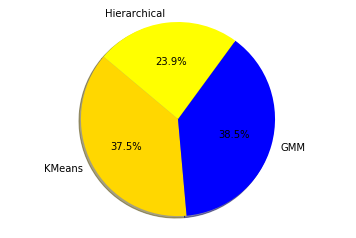

In [35]:
labels =  'KMeans', 'GMM', 'Hierarchical',
sizes = [83.86241496193628, 86.10892810364126, 53.5]
colors = ['gold', 'blue', 'yellow']
explode = (0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()